## EDA Notebook ##

Schoeggl_Vorauer 2020

In [3]:
# Start by importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Function_Definitions import *

In [72]:
# Loading the clean DataFrames 
archivem6 = datetime(pd.read_csv(r'..\Data\Clean\carchive_M6.csv'))
nrtmodis  = datetime(pd.read_csv(r'..\Data\Clean\cnrt_M6.csv'))
archivev1 = datetime(pd.read_csv(r'..\Data\Clean\carchive_V1.csv'))
nrtv1     = datetime(pd.read_csv(r'..\Data\Clean\cnrt_V1.csv'))
rain      = datetime(pd.read_csv(r'..\Data\Clean\rain.csv'))
wind      = datetime(pd.read_csv(r'..\Data\Clean\wind.csv'))
weather   = datetime(pd.read_csv(r'..\Data\Clean\cweather.csv'))

In [39]:
# Restricting the m6 archive date to the time interval of the v1 archive data
am6 = archivem6[(archivem6.acq_date>=archivev1.acq_date.min()) & (archivem6.acq_date <= archivev1.acq_date.max())]

In [46]:
# Looking at the behaviour of the brightness columns and the frp over the years
m6cols = ['frp','brightness','bright_t31']
am6_y = timeselect(am6, freq='M', columns=m6cols)
v1cols = ['frp','bright_ti4','bright_ti5']
av1_y = timeselect(archivev1, freq='M', columns=v1cols)

D:\data science\git\AustralienFiresFromSpace_Schoeggl_Vorauer\Notebooks\Function_Definitions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')


## Question 1: Which year|month|state had the highest values for brightness (all sensors) and frp (released energy)? ##

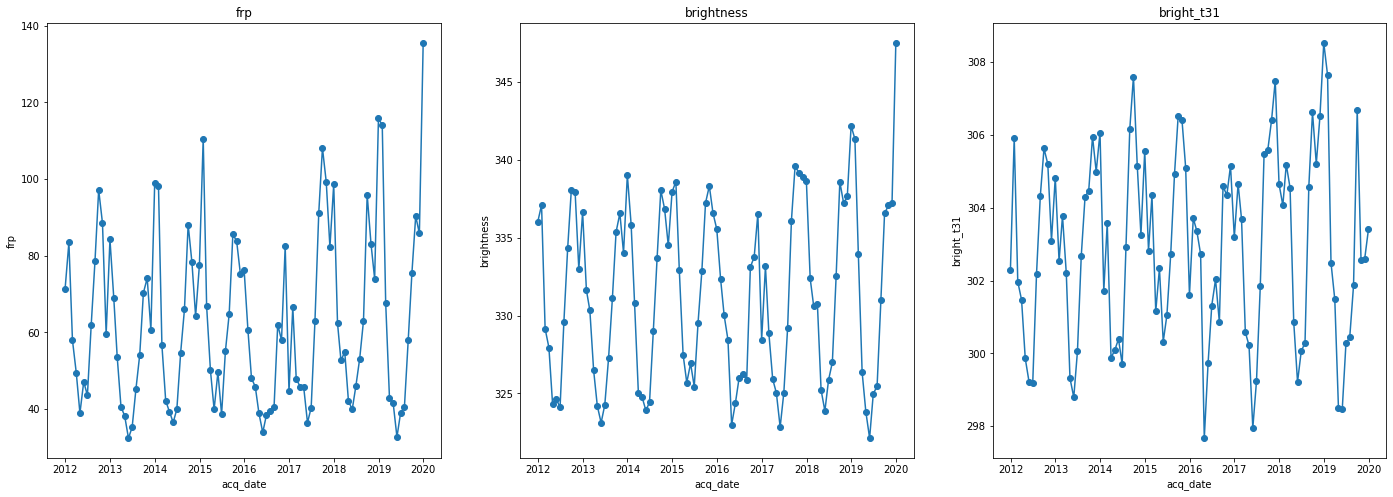

In [44]:
# Plotting the development of the selected columns
fig, ax = plt.subplots(1,3, figsize = (24,8))
for i,j in enumerate(m6cols):
    ax[i].plot(am6_y.set_index('acq_date')[j], '-o')
    ax[i].set_title(j)
    ax[i].set_ylabel(j)
    ax[i].set_xlabel('acq_date')


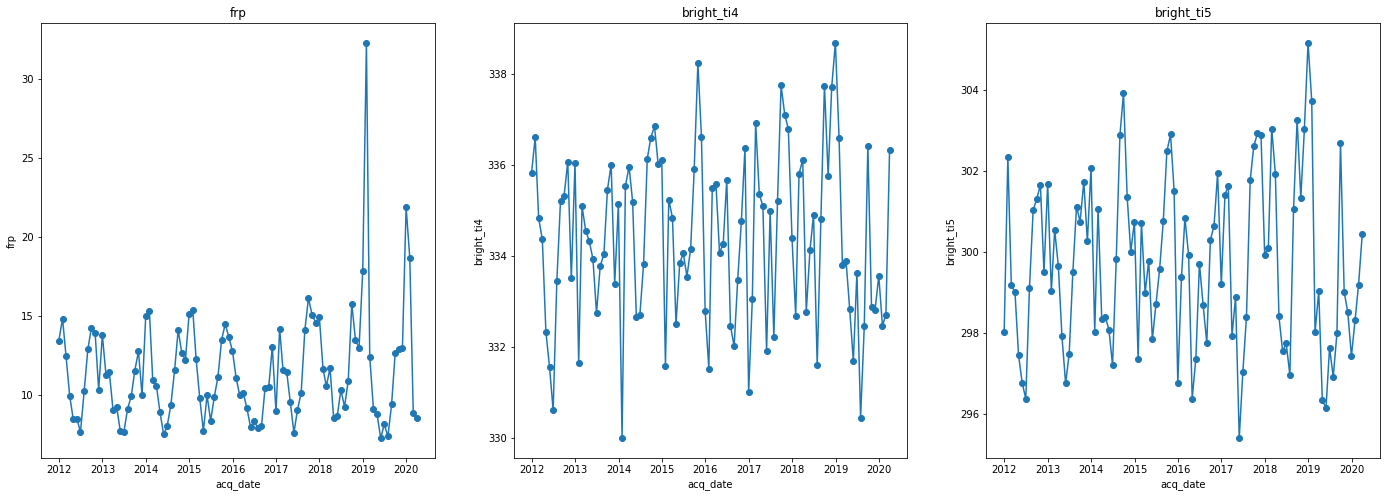

In [45]:
fig, ax = plt.subplots(1,3, figsize = (24,8))
for i,j in enumerate(v1cols):
    ax[i].plot(av1_y.set_index('acq_date')[j], '-o')
    ax[i].set_title(j)
    ax[i].set_ylabel(j)
    ax[i].set_xlabel('acq_date')

We can see that 2019 was the year with the most released engery (frp) as well as the most brightness values for all sensors (i.e. an increase in fire incidents).

However, from the modis 6 data (top plots) we only have values until march but it already has a higher peak for frp and brightness than 2019.

In [70]:
# Let's take a closer look into 2019 and group the date by the 6 different States
am6_2019 = [am6[(am6.Year == 2019) & (am6.State == i)] for i in am6.State.unique()]
av1_2019 = [archivev1[(archivev1.Year==2019) & (archivev1.State == i)] for i in archivev1.State.unique()]

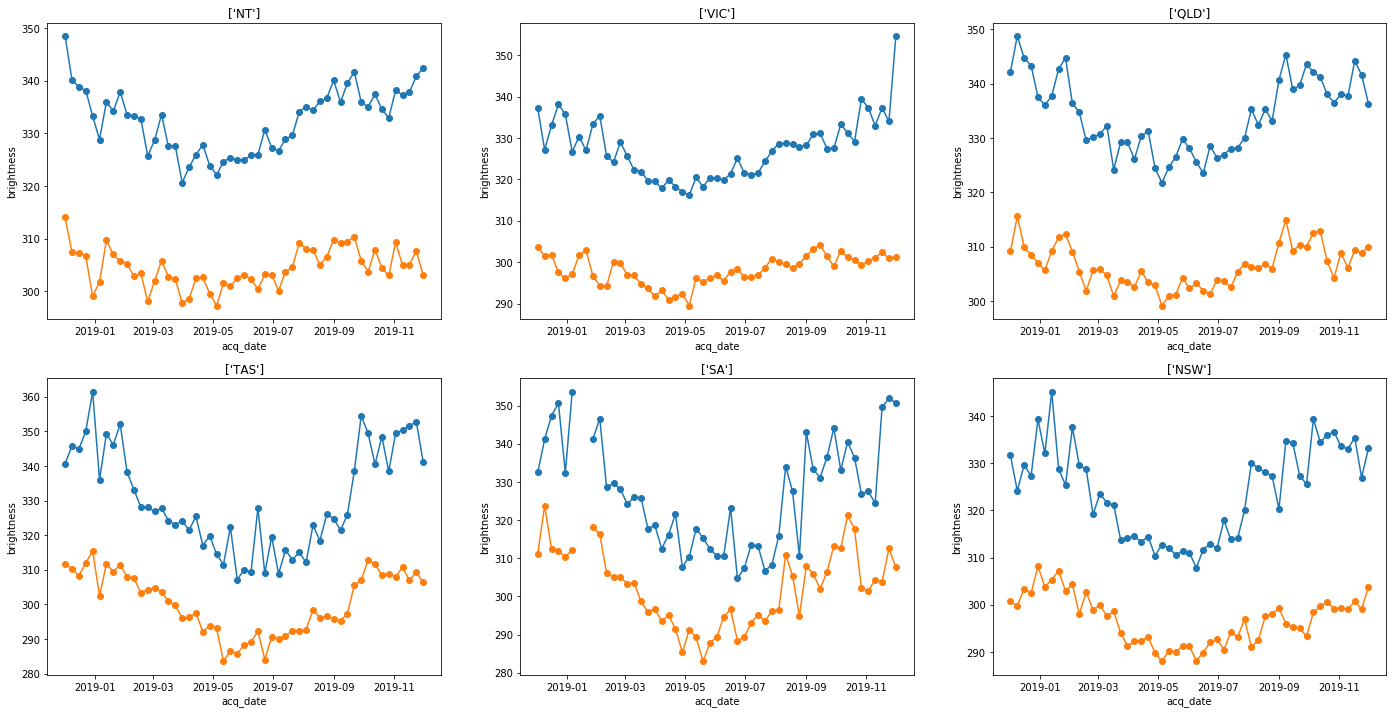

In [88]:
# Here we plot the brightness with a weekly mean frequency for each State
prop1 = 'brightness'
prop2 = 'bright_t31'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(am6_2019):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o')
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop2].mean(), '-o')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('brightness')
    a[i].set_xlabel('acq_date')
    #a[i].legend(m6cols)

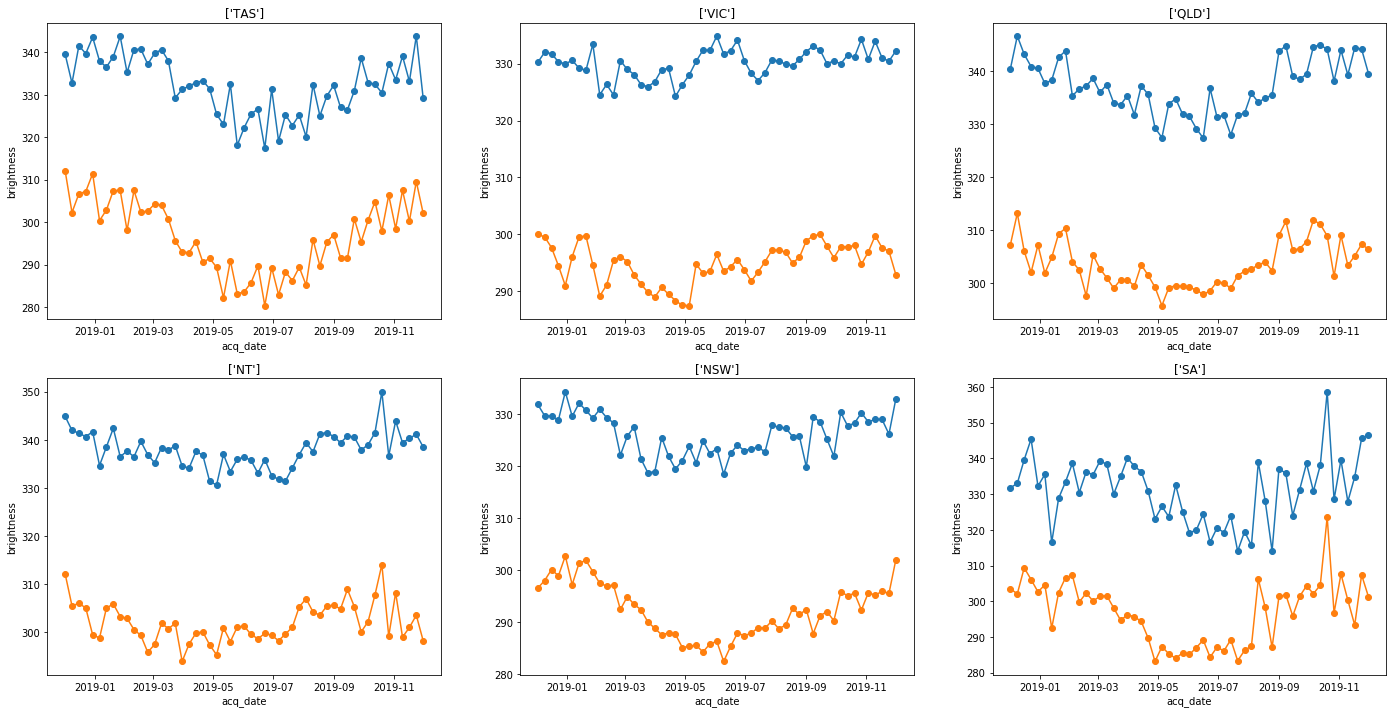

In [90]:
prop1 = 'bright_ti4'
prop2 = 'bright_ti5'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(av1_2019):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o')
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop2].mean(), '-o')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('brightness')
    a[i].set_xlabel('acq_date')
    #a[i].legend(m6cols)

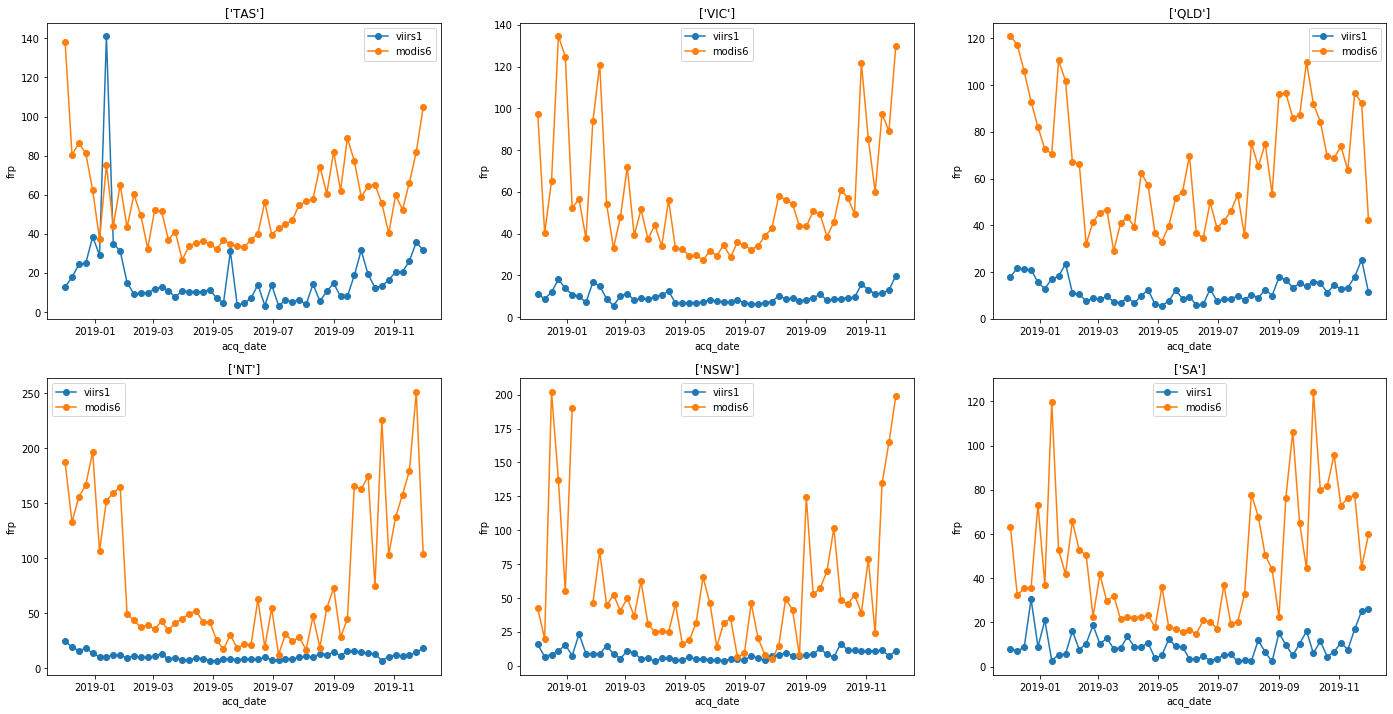

In [92]:
prop1 = 'frp'
fig, ax = plt.subplots(2,3, figsize = (24,12))
a = ax.ravel()
for i,j in enumerate(av1_2019):
    a[i].plot(j.groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o', label = 'viirs1')
    a[i].plot(am6_2019[i].groupby([pd.Grouper(key='acq_date', freq='W')])[prop1].mean(), '-o', label = 'modis6')
    a[i].set_title(j.State.unique())
    a[i].set_ylabel('frp')
    a[i].set_xlabel('acq_date')
    a[i].legend()

We can see, that in general for the spring/summer months in the beginning and end of the year, the values for the brightness sensor are the hightest and in the autumn/winter months the values are the lowest, except for the state Victoria in the south east where the viirs satellite has a peak in the winter months. This might be due to the sensitivity cap on the on board sensors.
As for the the states with the brightest fires, Victoria is on average the lowest together with NSW. South Australia and NA had the highest brightness on average in 2019. The same months for the released energy measured (frp) as for the brightness values show the highest values. However, here we see that Queensland and South Australia had the lowest values and NT and NSW the highest on average in 2019.

## Question 2: Which year|month|state had the highest values for TempMax and lowest for TempMin? ##

In [94]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude',
       'Month', 'State', 'season'],
      dtype='object')

In [95]:
# Looking at the behaviour of the brightness columns and the frp over the years
weathercols = ['MinTemp','MaxTemp','Rainfall']
weather_y = timeselect(weather, freq='M', columns=weathercols)

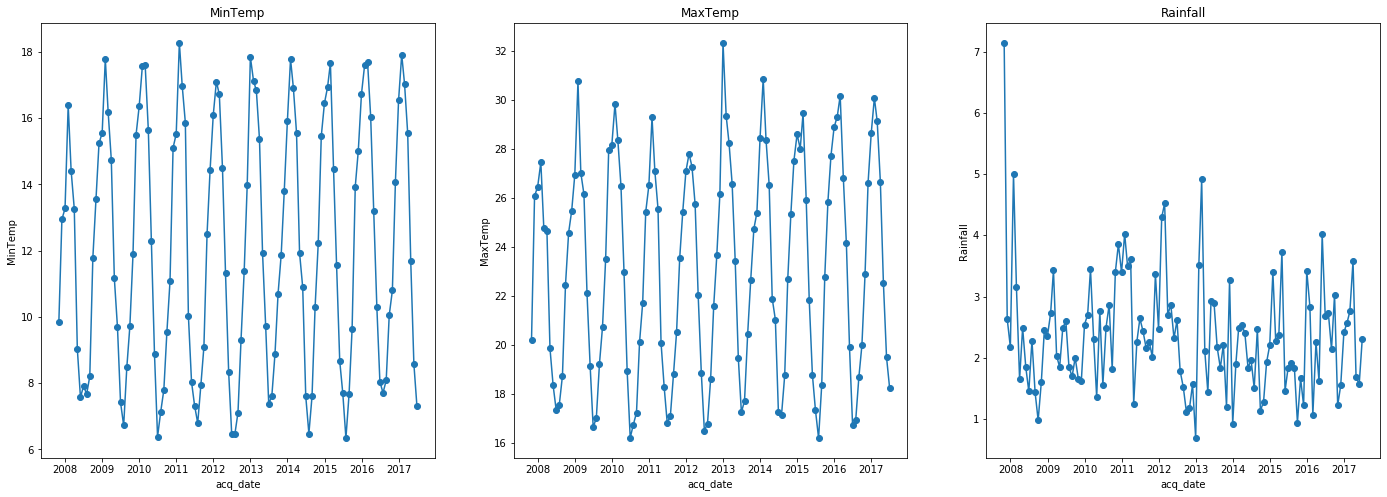

In [96]:
# Plotting the development of the selected columns
fig, ax = plt.subplots(1,3, figsize = (24,8))
for i,j in enumerate(weathercols):
    ax[i].plot(weather_y.set_index('acq_date')[j], '-o')
    ax[i].set_title(j)
    ax[i].set_ylabel(j)
    ax[i].set_xlabel('acq_date')

Here we don't see any year that stands out except for the rainfall in 2008. However, to make the values comparable with the fires, we will here also investigate 2019 closer.

In [97]:
# Let's take a closer look into 2019 and group the date by the 6 different States
weather_2019 = [weather[(weather.Year == 2019) & (weather.State == i)] for i in weather.State.unique()]

AttributeError: 'DataFrame' object has no attribute 'Year'

In [5]:
am6_2018_summer = archivem6[(archivem6.Year==2018) & (archivem6.season==2)]
av1_2018_summer = archivev1[(archivev1.Year==2018) & (archivev1.season==2)]

In [7]:
am6_2018_summer.shape

(40422, 13)

In [8]:
av1_2018_summer.shape

(190648, 13)

In [14]:
am6_2018_summer[am6_2018_summer.confidence<50].groupby('State')['brightness'].mean()

State
NSW    315.560900
NT     326.189220
QLD    325.049515
SA     325.615721
TAS    320.978873
VIC    320.610937
Name: brightness, dtype: float64

In [73]:
rain.keys()

Index(['Nearest town', 'State', 'latitude', 'longitude',
       'Severity confidence description', 'Intense precipitation amount',
       'Intense precipitation period', 'Total precipitation',
       'Total precipitation duration', 'Water course', 'acq_date', 'acq_time',
       'Year', 'Month', 'season'],
      dtype='object')

In [74]:
rain.Year

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
3461    2018
3462    2018
3463    2019
3464    2019
3465    2009
Name: Year, Length: 3466, dtype: int64

In [8]:
am6_date_sel = am6_y[(am6_y.acq_date>=av1_y.acq_date.min()) & (am6_y.acq_date <= av1_y.acq_date.max())]

In [7]:
am6_date_sel.set_index('acq_date')['frp'].corr(av1_y.set_index('acq_date')['frp'])

0.9101099311553915

In [3]:
archivem6 = datetime(archivem6)

In [4]:
am6 = archivem6[(archivem6.acq_date>=weather.acq_date.min()) & (archivem6.acq_date <= weather.acq_date.max())]

In [5]:
weather = datetime(weather)

In [6]:
weather = weather.sort_values('acq_date')
am6 = am6.sort_values('acq_date')

In [7]:
weather.acq_date.min()

Timestamp('2007-11-01 00:00:00')

In [8]:
am6.acq_date.unique()

array(['2007-11-01T00:00:00.000000000', '2007-11-02T00:00:00.000000000',
       '2007-11-03T00:00:00.000000000', ...,
       '2017-06-23T00:00:00.000000000', '2017-06-24T00:00:00.000000000',
       '2017-06-25T00:00:00.000000000'], dtype='datetime64[ns]')

In [16]:
weather.acq_date.min() == am6.acq_date.min()

True

In [28]:
adate = am6.acq_date.unique()
wdate = weather.acq_date.unique()

In [34]:
bla = np.array([adate[i] in wdate for i in range(len(adate))])

In [43]:
useless = np.dot(np.ones(am6.shape),bla)

ValueError: shapes (2452611,9) and (3525,) not aligned: 9 (dim 1) != 3525 (dim 0)

In [54]:
bla2 = np.array(am6)

In [55]:
bla2

array([[-14.2603, 142.0639, 321.5, ..., 54, 294.6, 33.7],
       [-24.9943, 148.1014, 302.8, ..., 8, 287.4, 7.7],
       [-26.2635, 149.8218, 308.0, ..., 73, 291.4, 9.7],
       ...,
       [-13.8689, 130.4044, 317.3, ..., 37, 304.3, 5.8],
       [-20.0796, 127.6062, 317.3, ..., 22, 301.1, 6.7],
       [-18.6013, 124.876, 310.4, ..., 80, 289.5, 11.1]], dtype=object)

In [53]:
bla3 = am6.set_index('acq_date').loc[weather['acq_date']]

KeyboardInterrupt: 

In [36]:
'''filling function for longitude, latitude into correct rows'''
def reverse_date(df1, df2):
    temp = np.zeros(df1.shape[0])
    for i in df1.acq_date.unique():
        temp[df1.acq_date == i] = df2[df2.acq_date==i]
    return temp

3436

In [46]:
am6.shape

(2452611, 9)

In [21]:
wdate.unique()

array(['2007-11-01T00:00:00.000000000', '2007-11-02T00:00:00.000000000',
       '2007-11-03T00:00:00.000000000', ...,
       '2017-06-23T00:00:00.000000000', '2017-06-24T00:00:00.000000000',
       '2017-06-25T00:00:00.000000000'], dtype='datetime64[ns]')

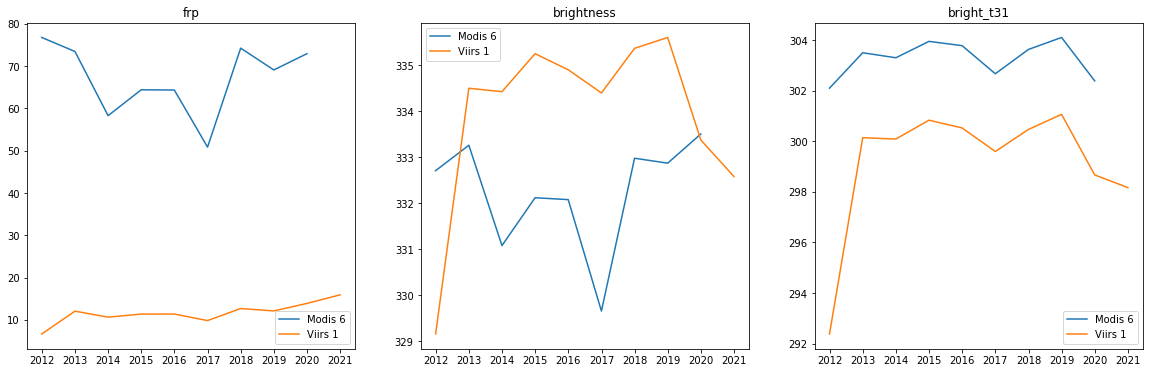

In [33]:
fig, ax = plt.subplots(1,3, figsize = (20,6))

for i in range(3):
    ax[i].plot(am6_y_sel.set_index('acq_date')[m6cols[i]], label='Modis 6')
    ax[i].plot(av1_y.set_index('acq_date')[v1cols[i]], label='Viirs 1')
    ax[i].legend()
    ax[i].set_title(m6cols[i])

In [46]:
weeks = date_seperating(weather, 'W')

In [30]:
weeks[42]

,acq_date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude
0,2008-08-04,Sydney,5.6,15.8,0.0,3.4,7.6,NaN,NaN,W,...,1021.2,6.0,7.0,9.2,15.3,No,0.6,No,-33.854816,151.216454
1,2008-08-04,Canberra,-3.4,12.5,0.0,3.0,6.8,SSE,48.0,NNW,...,1021.8,6.0,7.0,1.4,11.2,No,0.0,No,-35.297591,149.101268
2,2008-08-04,Melbourne,6.7,14.3,0.4,1.4,7.1,SW,41.0,W,...,1025.9,6.0,6.0,8.9,13.5,No,0.0,No,-37.814218,144.963161
3,2008-08-04,Brisbane,8.5,16.9,0.0,3.8,0.0,WNW,19.0,SW,...,1022.8,8.0,8.0,12.1,16.8,No,0.0,No,-27.468968,153.023499
4,2008-08-04,Adelaide,5.5,14.9,0.0,4.6,5.7,WSW,30.0,NaN,...,1030.8,NaN,NaN,10.6,13.9,No,0.0,No,-34.928180,138.599931
5,2008-08-04,Perth,1.8,22.5,0.0,3.8,10.4,NNW,39.0,NNE,...,1025.8,0.0,3.0,13.2,22.1,No,0.0,No,-31.952712,115.860480
6,2008-08-04,Hobart,1.2,13.5,1.0,0.2,8.3,N,56.0,N,...,1018.2,2.0,4.0,6.4,12.0,No,0.0,No,-42.882509,147.328123
7,2008-08-04,Darwin,18.1,30.8,0.0,9.2,10.8,SE,46.0,SE,...,1014.7,2.0,1.0,21.1,29.5,No,0.0,No,-12.460440,130.841047
8,2008-08-05,Sydney,5.3,17.6,0.6,1.8,10.8,NaN,NaN,W,...,1025.4,1.0,5.0,9.5,17.5,No,0.0,No,-33.854816,151.216454
9,2008-08-05,Canberra,-5.3,13.1,0.0,2.2,7.9,NW,33.0,N,...,1025.6,6.0,6.0,0.1,12.2,No,0.0,No,-35.297591,149.101268


In [80]:
weeks[42].acq_date[0]

Timestamp('2008-08-04 00:00:00')

In [54]:
weeks_am6 = date_seperating(archivem6, 'W')

In [55]:
weeks_am6[406].acq_date[0]

Timestamp('2008-07-28 00:00:00')

In [48]:
bla2 = weeks[42].groupby('Location').mean()

In [103]:
bla2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,latitude,longitude
Location,,,,,,,,,,,,,,,,,,,
Adelaide,5.028571,14.700000,0.600000,2.160000,5.371429,35.714286,7.000000,15.142857,70.857143,51.000000,1029.542857,1027.471429,NaN,NaN,9.628571,13.842857,0.600000,-34.928180,138.599931
Brisbane,8.728571,21.171429,1.428571,3.457143,7.242857,27.142857,10.571429,10.285714,53.857143,44.571429,1024.742857,1021.600000,3.000000,4.000000,14.800000,19.657143,1.428571,-27.468968,153.023499
Canberra,-1.185714,13.128571,0.000000,3.028571,6.871429,43.000000,12.285714,22.571429,67.428571,35.714286,1025.557143,1022.842857,5.142857,4.857143,5.257143,12.114286,0.000000,-35.297591,149.101268
Darwin,19.257143,32.314286,0.000000,8.500000,10.028571,44.428571,19.571429,17.714286,37.857143,25.714286,1016.557143,1012.357143,2.857143,2.571429,23.185714,30.800000,0.000000,-12.460440,130.841047
Hobart,3.700000,13.942857,1.028571,1.857143,7.900000,50.142857,14.857143,17.714286,63.142857,46.000000,1019.742857,1017.614286,2.285714,4.428571,8.814286,12.257143,0.885714,-42.882509,147.328123
Melbourne,7.200000,13.700000,2.171429,1.885714,3.642857,39.428571,20.857143,20.714286,71.714286,55.714286,1025.957143,1024.500000,6.714286,6.857143,9.671429,13.014286,2.114286,-37.814218,144.963161
Perth,5.057143,19.642857,0.028571,3.457143,8.285714,34.714286,11.000000,13.857143,54.833333,39.285714,1029.657143,1026.300000,3.571429,3.571429,12.242857,18.714286,0.028571,-31.952712,115.860480
Sydney,7.357143,16.728571,3.428571,2.885714,6.171429,NaN,16.285714,16.571429,65.428571,47.285714,1024.471429,1022.057143,5.428571,6.142857,10.685714,15.814286,3.428571,-33.854816,151.216454


In [56]:
bla3 = weeks_am6[406].groupby('acq_date').mean()

In [114]:
bla3

,latitude,longitude,brightness,scan,track,confidence,bright_t31,frp
acq_date,,,,,,,,
2008-08-04,-17.152042,138.311757,320.805479,1.805822,1.276712,61.645548,295.021747,36.186986
2008-08-05,-15.488719,135.821143,323.342788,1.485457,1.170553,61.883413,298.680168,28.436058
2008-08-06,-16.315208,135.659078,327.020186,1.697205,1.236646,66.248447,300.364752,40.670031
2008-08-07,-17.134619,137.514230,325.401969,1.436568,1.158931,64.824191,296.757384,38.147257
2008-08-08,-15.926248,134.701380,330.432040,1.629268,1.210643,67.516630,302.393237,46.972727
2008-08-09,-16.955184,135.719144,320.916887,1.759894,1.256596,62.215040,297.598681,38.190106
2008-08-10,-14.124703,133.210086,328.944203,1.495718,1.184980,66.034256,301.538999,39.875099


In [64]:
import folium
import folium.plugins as plugins
from folium.plugins import HeatMap
f = folium.Figure(width=750, height=500)
center_lat = -24.003249 
center_long = 133.737310
m = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(f)
for i in range(0,bla2.shape[0]):    
    location=[bla2.iloc[i]['latitude'], bla2.iloc[i]['longitude']]
    folium.CircleMarker(location,radius=bla2.WindSpeed3pm[i],color='red').add_to(m)
data_heat1 = bla3[['latitude','longitude','frp']].values.tolist()
#plugins.HeatMap(data_heat).add_to(m)
data_heat2 = bla3[['latitude','longitude','brightness']].values.tolist()
#plugins.HeatMap(data_heat,gradient={310: 'blue', 325: 'lime', 335: 'red'}).add_to(m)
HeatMap(data_heat1).add_to(folium.FeatureGroup(name='Heat Map1').add_to(m))
#HeatMap(data_heat2).add_to(folium.FeatureGroup(name='Heat Map2').add_to(m))
folium.TileLayer('stamenterrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
add = '/MapServer/tile/{z}/{y}/{x}'
ESRI = dict(World_Ocean_Base='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Base',
            World_Navigation_Charts='http://services.arcgisonline.com/ArcGIS/rest/services/Specialty/World_Navigation_Charts',
            World_Ocean_Reference='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Reference',
            NatGeo_World_Map='http://services.arcgisonline.com/arcgis/rest/services/NatGeo_World_Map/MapServer',
            World_Imagery='http://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer',
            World_Physical_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Physical_Map/MapServer',
            World_Shaded_Relief='http://services.arcgisonline.com/arcgis/rest/services/World_Shaded_Relief/MapServer',
            World_Street_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Street_Map/MapServer',
            World_Terrain_Base='http://services.arcgisonline.com/arcgis/rest/services/World_Terrain_Base/MapServer',
            World_Topo_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Topo_Map/MapServer')
            #vegetation_Map='http://services.ga.gov.au/gis/rest/services/NM_Cultivated_and_Native_Vegetation/MapServer')

for tile_name, tile_url in ESRI.items():
    tile_url += add
    folium.TileLayer(tile_url, attr=tile_url, name=tile_name).add_to(m)
    #m.add_tile_layer(tile_name=tile_name,
    #                 tile_url=tile_url)
#folium.TileLayer('https://opentopomap.org/#map={z}/{y}/{x}', attr = 'https://opentopomap.org/#map={z}/{y}/{x}', name = 'vegetation').add_to(m)
#m.add_layers_to_map()
folium.LayerControl().add_to(m)

display(m)

In [3]:
m6['acq_date'] = pd.to_datetime(m6['acq_date'])

In [6]:
archivem6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081220 entries, 0 to 5081219
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   confidence  int64  
 7   bright_t31  float64
 8   frp         float64
dtypes: float64(7), int64(1), object(1)
memory usage: 348.9+ MB


In [23]:
rainy_days.head()

acq_date
2006-01-06    NaN
2006-01-07    NaN
2006-01-12    NaN
2006-01-15    NaN
2006-01-15    NaN
Name: acq_date, dtype: object

In [26]:
rainy_days = [m6.acq_date[m6.acq_date == i] for i in rain.acq_date.unique() if '2006-01' in i]

In [11]:
nrtmodis.head()

,latitude,longitude,brightness,scan,track,acq_date,confidence,bright_t31,frp
0,-16.357,137.685,336.9,1.5,1.2,2020-01-01,82,299.3,43.6
1,-16.360,137.699,329.5,1.5,1.2,2020-01-01,53,299.3,25.0
2,-16.359,137.678,327.2,1.5,1.2,2020-01-01,20,298.4,20.3
3,-16.361,137.692,335.8,1.5,1.2,2020-01-01,77,299.6,40.8
4,-16.364,137.706,329.5,1.5,1.2,2020-01-01,52,297.7,29.1


In [17]:
def timeselect(df, freq = 'D', fct = 'mean', columns = ['frp','brightness', 'bright_t31']):
    df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')
    if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')
    if fct == 'max':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].max().reset_index().sort_values('acq_date')
    if fct == 'min':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].min().reset_index().sort_values('acq_date')
    return out

In [12]:
bla = timeselect(nrtmodis, 'M', fct = 'max', columns = 'confidence')

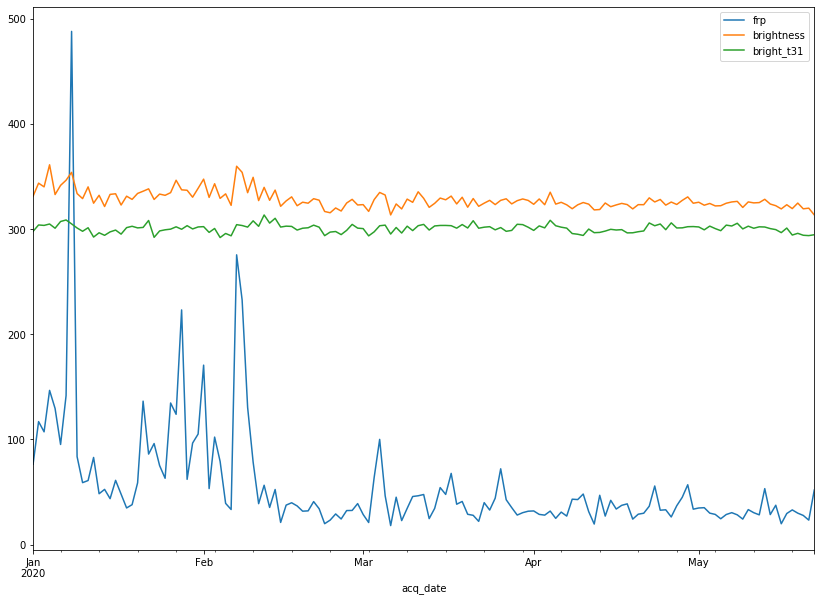

In [19]:
df.set_index('acq_date').plot(figsize = (14,10))

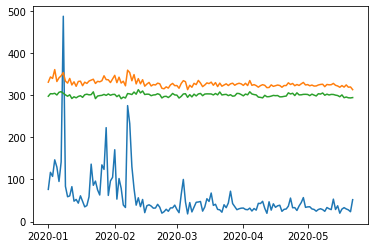

In [21]:
plt.plot(df.set_index('acq_date'))

In [ ]:
m6['acq_date'] = pd.to_datetime(m6['acq_date'])
dfm6 = m6.groupby([pd.Grouper(key='acq_date', freq='D')])[['frp','brightness', 'bright_t31']].mean().reset_index().sort_values('acq_date')

In [ ]:
dfm6.set_index('acq_date').plot(figsize = (14,10))

In [ ]:
plt.plot(dfm6.set_index('acq_date'))

In [2]:
archivem6 = pd.read_csv(r'..\Data\Clean\carchive_M6.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [67]:
#archivem6['State'] = archivem6['State'].astype('category')
#archivem6 = pd.get_dummies(archivem6, drop_first=True)

MemoryError: Unable to allocate 33.0 GiB for an array with shape (5081220, 6972) and data type uint8

In [4]:
bm6 = archivem6[archivem6.Year > 2018]

In [5]:
bm6.shape

(310484, 13)

In [6]:
X = bm6.drop(['confidence','scan','track','acq_date', 'State'], 1)
y = bm6.confidence>=80

In [7]:
X.shape

(310484, 8)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [26]:
rf = rfc(max_depth=2)

In [27]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred = rf.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.92      0.83     56639
        True       0.86      0.64      0.74     45821

    accuracy                           0.79    102460
   macro avg       0.81      0.78      0.78    102460
weighted avg       0.81      0.79      0.79    102460



In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(X_train,y_train)

D:\ProgramData\Anaconda\envs\py365\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
lr_pred = lr.predict(X_test)

In [34]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       False       0.81      0.89      0.85     56639
        True       0.85      0.75      0.80     45821

    accuracy                           0.83    102460
   macro avg       0.83      0.82      0.82    102460
weighted avg       0.83      0.83      0.83    102460



In [40]:
lda = LDA(solver = 'lsqr')

In [41]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [42]:
lda_pred = lda.predict(X_test)

In [43]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       False       0.81      0.89      0.85     56639
        True       0.85      0.75      0.80     45821

    accuracy                           0.83    102460
   macro avg       0.83      0.82      0.82    102460
weighted avg       0.83      0.83      0.83    102460



In [12]:
weather = pd.read_csv(r'..\Data\Clean\cweather.csv')

In [13]:
weather.keys()

Index(['acq_date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'latitude', 'longitude', 'Year',
       'Month', 'State', 'season'],
      dtype='object')

In [14]:
weather.RainTomorrow.unique()

array([False,  True])

In [22]:
weather.WindDir3pm.unique()

array(['135.0', '67.5', '90.0', '157.5', '112.5', '337.5', '22.5',
       '225.0', '315.0', 'SSW', '202.5', '0.0', '292.5', '45.0', '270.0',
       '247.5', '180.0'], dtype=object)

In [23]:
Xw = weather.drop(['acq_date', 'Location', 'RainTomorrow', 'Year', 'Month', 'State', 'season', 'WindGustDir', 'WindDir3pm', 'WindDir9am'], 1)
yw = weather.RainTomorrow

In [24]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.33)

In [25]:
ldaw = LDA()
ldaw.fit(Xw_train, yw_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [27]:
ldaw_pred = ldaw.predict(Xw_test)

In [28]:
print(classification_report(yw_test, ldaw_pred))

              precision    recall  f1-score   support

       False       0.84      0.94      0.88     36455
        True       0.62      0.36      0.45     10469

    accuracy                           0.81     46924
   macro avg       0.73      0.65      0.67     46924
weighted avg       0.79      0.81      0.79     46924



In [29]:
rfw = rfc()

In [30]:
rfw.fit(Xw_train, yw_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rfw_pred = rfw.predict(Xw_test)

In [33]:
print(classification_report(yw_test, rfw_pred))

              precision    recall  f1-score   support

       False       0.87      0.96      0.91     36455
        True       0.77      0.51      0.62     10469

    accuracy                           0.86     46924
   macro avg       0.82      0.73      0.76     46924
weighted avg       0.85      0.86      0.85     46924



In [34]:
lrw = LogisticRegression()

In [35]:
lrw.fit(Xw_train, yw_train)

D:\ProgramData\Anaconda\envs\py365\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lrw_pred = lrw.predict(Xw_test)

In [37]:
print(classification_report(yw_test, lrw_pred))

              precision    recall  f1-score   support

       False       0.82      0.97      0.89     36455
        True       0.71      0.28      0.41     10469

    accuracy                           0.81     46924
   macro avg       0.77      0.63      0.65     46924
weighted avg       0.80      0.81      0.78     46924



In [41]:
from sklearn import linear_model
X_conf = np.array(bm6.drop(['confidence','scan','track','acq_date', 'State'], 1))
y_conf = bm6.confidence

.

(-0.05, 1.05, -0.9704034672308256, 0.9598800120558973)

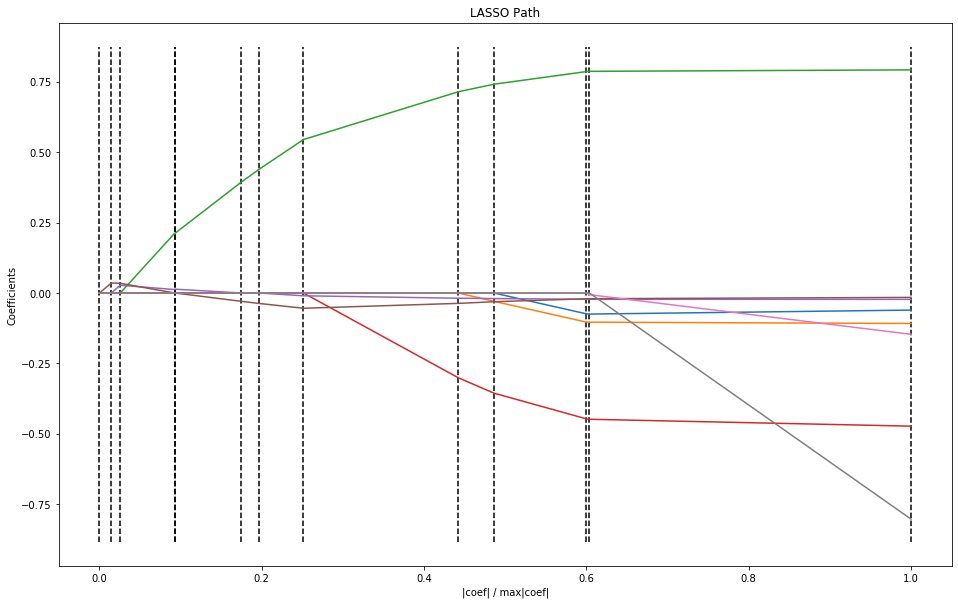

In [43]:
_, _, coefs = linear_model.lars_path(X_conf, y_conf, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.figure(figsize=(16,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')